**HW 1**

**CPSC 8430 Deep Learning**

**John Pascoe**

#Requirements

To use this python notebook, upload it to your Google drive and open it with Google Colab.

In [ ]:
!pip install tensorflow
!pip install torch
!pip install matplotlib


# HW1-1 Deep vs Shallow

##**Simulate a Function**

// function is y = sin(x) + 0.5x

Epoch 0: Loss Model 1: 13.726665496826172, Loss Model 2: 252.23387145996094
Epoch 100: Loss Model 1: 0.49194106459617615, Loss Model 2: 0.5001437664031982
Epoch 200: Loss Model 1: 0.4803817868232727, Loss Model 2: 0.47335535287857056
Epoch 300: Loss Model 1: 0.4720933437347412, Loss Model 2: 0.4633917808532715
Epoch 400: Loss Model 1: 0.4660899043083191, Loss Model 2: 0.45876801013946533
Epoch 500: Loss Model 1: 0.4617835581302643, Loss Model 2: 0.45610156655311584
Epoch 600: Loss Model 1: 0.4587176740169525, Loss Model 2: 0.45432397723197937
Epoch 700: Loss Model 1: 0.45654651522636414, Loss Model 2: 0.4530632197856903
Epoch 800: Loss Model 1: 0.45500823855400085, Loss Model 2: 0.452147901058197
Epoch 900: Loss Model 1: 0.45391055941581726, Loss Model 2: 0.4514778256416321


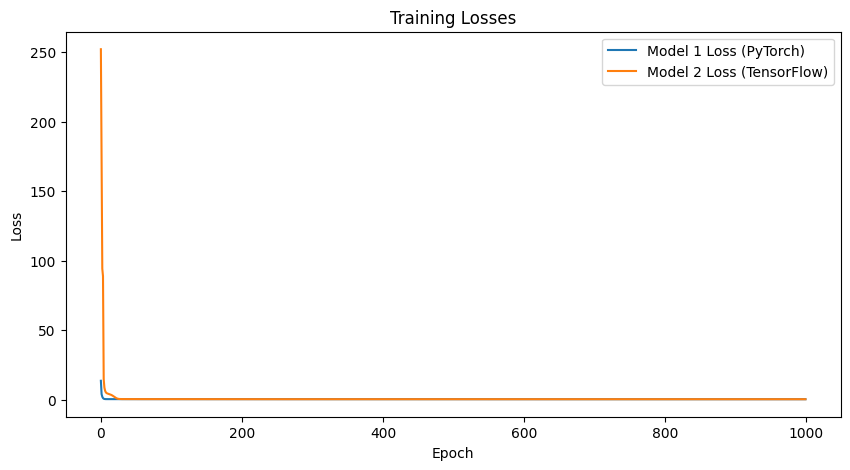

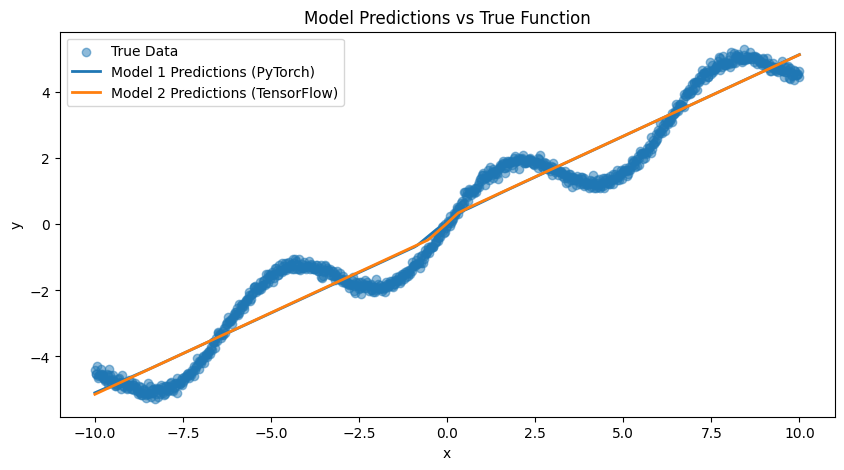

In [2]:
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

x_values = tf.linspace(-10.0, 10.0, 1000)
y_values = tf.sin(x_values) + 0.5 * x_values + tf.random.normal([1000], stddev=0.1)

x_values_torch = torch.from_numpy(x_values.numpy()).float().view(-1, 1)
y_values_torch = torch.from_numpy(y_values.numpy()).float().view(-1, 1)

# PyTorch model (Model 1)
class TorchModel(torch.nn.Module):
    def __init__(self):
        super(TorchModel, self).__init__()
        self.linear1 = torch.nn.Linear(1, 10)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

model_1 = TorchModel()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.01)
loss_fn_1 = torch.nn.MSELoss()

# TensorFlow model (Model 2)
class TFModel(tf.Module):
    def __init__(self):
        self.w1 = tf.Variable(tf.random.normal([1, 10]))
        self.b1 = tf.Variable(tf.zeros([10]))
        self.w2 = tf.Variable(tf.random.normal([10, 1]))
        self.b2 = tf.Variable(tf.zeros([1]))

    def __call__(self, x):
        x = tf.nn.relu(tf.matmul(x, self.w1) + self.b1)
        return tf.matmul(x, self.w2) + self.b2

model_2 = TFModel()
optimizer_2 = tf.optimizers.SGD(learning_rate=0.01)

epochs = 1000
losses_1 = []
losses_2 = []

for epoch in range(epochs):
    model_1.train()
    optimizer_1.zero_grad()
    predictions_1 = model_1(x_values_torch)
    loss_1 = loss_fn_1(predictions_1, y_values_torch)
    loss_1.backward()
    optimizer_1.step()
    losses_1.append(loss_1.item())

    with tf.GradientTape() as tape:
        predictions_2 = model_2(tf.reshape(x_values, (-1, 1)))
        loss_2 = tf.reduce_mean(tf.square(predictions_2 - tf.reshape(y_values, (-1, 1))))
    gradients = tape.gradient(loss_2, model_2.trainable_variables)
    optimizer_2.apply_gradients(zip(gradients, model_2.trainable_variables))
    losses_2.append(loss_2.numpy())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss Model 1: {loss_1.item()}, Loss Model 2: {loss_2.numpy()}')

plt.figure(figsize=(10, 5))
plt.plot(losses_1, label='Model 1 Loss (PyTorch)')
plt.plot(losses_2, label='Model 2 Loss (TensorFlow)')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, label='True Data', alpha=0.5)
with torch.no_grad():
    plt.plot(x_values.numpy(), predictions_1.numpy(), label='Model 1 Predictions (PyTorch)', linewidth=2)
plt.plot(x_values.numpy(), predictions_2.numpy(), label='Model 2 Predictions (TensorFlow)', linewidth=2)
plt.title('Model Predictions vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


**BONUS**

// function is y = cos(x) + 0.5x^2

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 0: Loss Model 1: 447.1492614746094, Loss Model 2: 535.5297241210938
Epoch 100: Loss Model 1: 77.75206756591797, Loss Model 2: 241.23858642578125
Epoch 200: Loss Model 1: 80.34341430664062, Loss Model 2: 224.37950134277344
Epoch 300: Loss Model 1: 67.79891204833984, Loss Model 2: 209.97952270507812
Epoch 400: Loss Model 1: 59.47523880004883, Loss Model 2: 197.26292419433594
Epoch 500: Loss Model 1: 53.756874084472656, Loss Model 2: 185.83334350585938
Epoch 600: Loss Model 1: 49.6091194152832, Loss Model 2: 175.80078125
Epoch 700: Loss Model 1: 46.49653244018555, Loss Model 2: 167.42755126953125
Epoch 800: Loss Model 1: 44.072235107421875, Loss Model 2: 160.75643920898438
Epoch 900: Loss Model 1: 42.146244049072266, Loss Model 2: 155.59596252441406


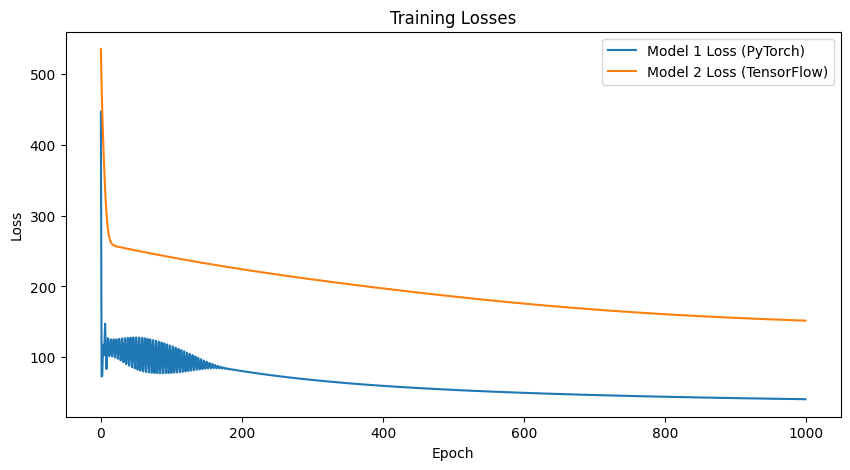

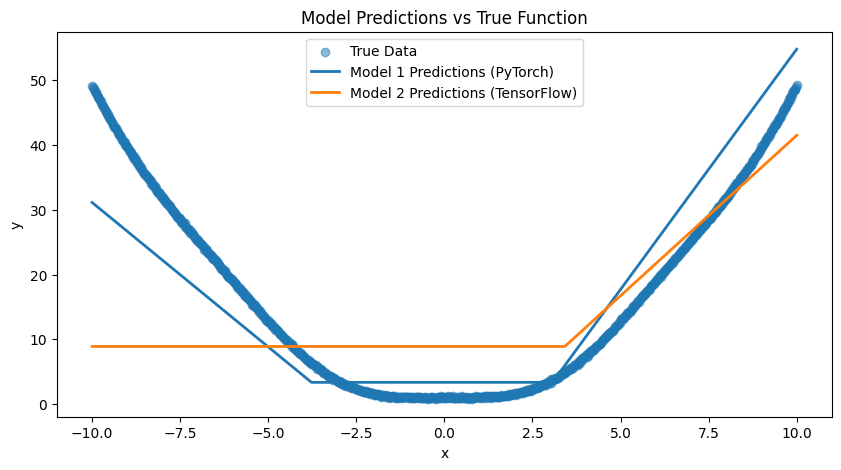

In [3]:
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

x_values = tf.linspace(-10.0, 10.0, 1000)
y_values = tf.cos(x_values) + 0.5 * tf.square(x_values) + tf.random.normal([1000], stddev=0.1)

x_values_torch = torch.from_numpy(x_values.numpy()).float().view(-1, 1)
y_values_torch = torch.from_numpy(y_values.numpy()).float().view(-1, 1)

# PyTorch model (Model 1)
class TorchModel(torch.nn.Module):
    def __init__(self):
        super(TorchModel, self).__init__()
        self.linear1 = torch.nn.Linear(1, 10)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

model_1 = TorchModel()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.01)
loss_fn_1 = torch.nn.MSELoss()

# TensorFlow model (Model 2)
class TFModel(tf.Module):
    def __init__(self):
        initializer = tf.initializers.GlorotUniform()
        self.w1 = tf.Variable(initializer([1, 10]))
        self.b1 = tf.Variable(tf.zeros([10]))
        self.w2 = tf.Variable(initializer([10, 1]))
        self.b2 = tf.Variable(tf.zeros([1]))

    def __call__(self, x):
        x = tf.nn.relu(tf.matmul(x, self.w1) + self.b1)
        return tf.matmul(x, self.w2) + self.b2

model_2 = TFModel()
optimizer_2 = tf.optimizers.SGD(learning_rate=0.001)

epochs = 1000
losses_1 = []
losses_2 = []

for epoch in range(epochs):
    model_1.train()
    optimizer_1.zero_grad()
    predictions_1 = model_1(x_values_torch)
    loss_1 = loss_fn_1(predictions_1, y_values_torch)
    loss_1.backward()
    optimizer_1.step()
    losses_1.append(loss_1.item())

    with tf.GradientTape() as tape:
        predictions_2 = model_2(tf.reshape(x_values, (-1, 1)))
        loss_2 = tf.reduce_mean(tf.square(predictions_2 - tf.reshape(y_values, (-1, 1)))) + 1e-7
    gradients = tape.gradient(loss_2, model_2.trainable_variables)
    optimizer_2.apply_gradients(zip(gradients, model_2.trainable_variables))
    losses_2.append(loss_2.numpy())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss Model 1: {loss_1.item()}, Loss Model 2: {loss_2.numpy()}')

plt.figure(figsize=(10, 5))
plt.plot(losses_1, label='Model 1 Loss (PyTorch)')
plt.plot(losses_2, label='Model 2 Loss (TensorFlow)')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, label='True Data', alpha=0.5)
with torch.no_grad():
    plt.plot(x_values.numpy(), predictions_1.numpy(), label='Model 1 Predictions (PyTorch)', linewidth=2)
plt.plot(x_values.numpy(), predictions_2.numpy(), label='Model 2 Predictions (TensorFlow)', linewidth=2)
plt.title('Model Predictions vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


##**Train on Actual Tasks**

// MNIST and DNN models

*May take a few minutes as it loads the MNIST dataset*

11490434/11490434 [==============================] - 1s 0us/step


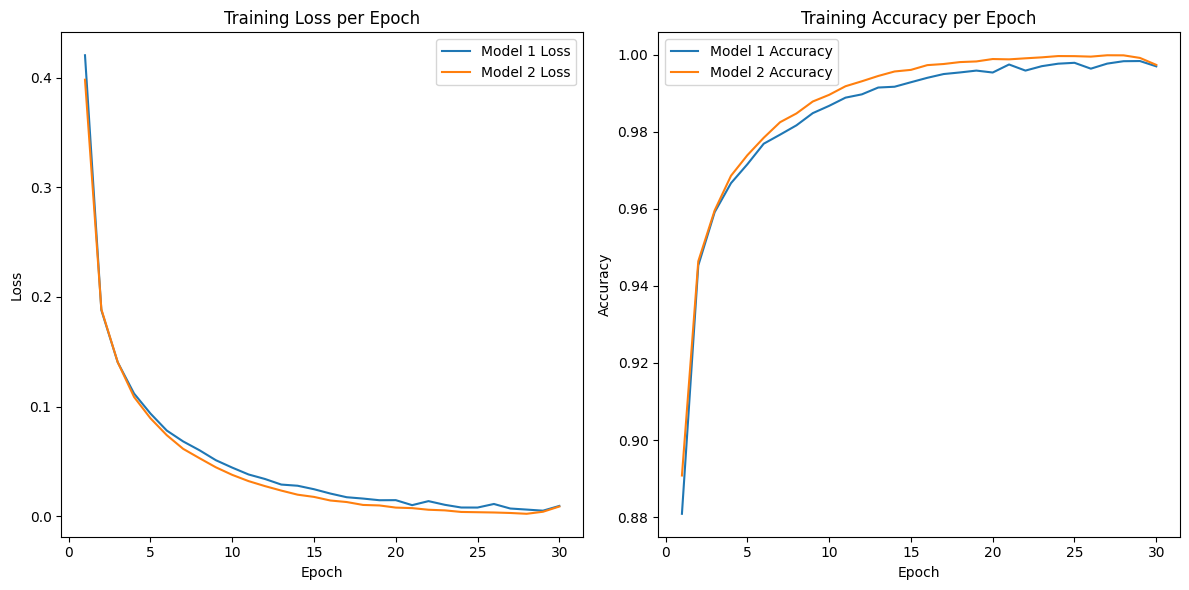

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Model 1: More layers, fewer neurons per layer
model1 = Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Model 2: Fewer layers, more neurons per layer
model2 = Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.2, verbose=0)
history2 = model2.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.2, verbose=0)

epochs = range(1, 31)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history1.history['loss'], label='Model 1 Loss')
plt.plot(epochs, history2.history['loss'], label='Model 2 Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history1.history['accuracy'], label='Model 1 Accuracy')
plt.plot(epochs, history2.history['accuracy'], label='Model 2 Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##**HW1-1 Report Questions**

*Simulate a Function*

- The first model I used was a simple DNN with one hidden layer and a total of 31 (1 input + 10 outputs + 10 biases) parameters. The second model was also a simple DNN with directly implemented weights and biases (1*10 + 10 for the first layer and 10*1 + 1 for the second layer) and a custom mean squared error calculation. I used two different functions for analysis: the first being y = sin(x) + 0.5x, and the second being y = cos(x) + 0.5x^2.

- The training loss graphs all indicate that the models very quickly minimized the loss function, with the loss dropping sharply within the first few epochs and flattening out. This indicates convergence for the models loss and they all converge to a low value which suggests good fitting to the training data.
The scatter plot of the true data shows the underlying pattern that both models aimed to learn. Both the models appear to predict the function accurately which is indicated by the lines fitting well to the distribution of true data points. There is only a significant difference in accuracy shown when the function y = cos(x) + 0.5x^2 was used to train the models.


*Train on Actual Tasks*

- Model 1 is a DNN model with three layers. This mode has more layers, but fewer neurons per layer compared to model 2. It contains a flattening layer, two dense ReLU layers, and a final dense layer using softmax activation. Model 2 is also a DNN model but it has fewer layers with more neurons per layer than model 1. It contains a flattening layer, one dense ReLU layer, and a final dense softmax activation layer. The task I chose was the MNIST dataset.

- Both models show a decreasing trend in training loss as the number of epochs increases, which indicates that both models learned from the training data over time. Model 2, with fewer layers and more neurons per layer, starts with a slightly higher loss but converges to a similar value as model 1 by the end. The accuracy graph shows an increasing trend for both models, which indicates an improvement in the models’ performances on the training set as they learned. Model 2 rapidly reached a high accuracy and stayed very close to model 1 throughout the process.



# HW1-2 Optimization

##**Visualize the Optimization Process**

Function trained on was y = sin(x) + 0.5x

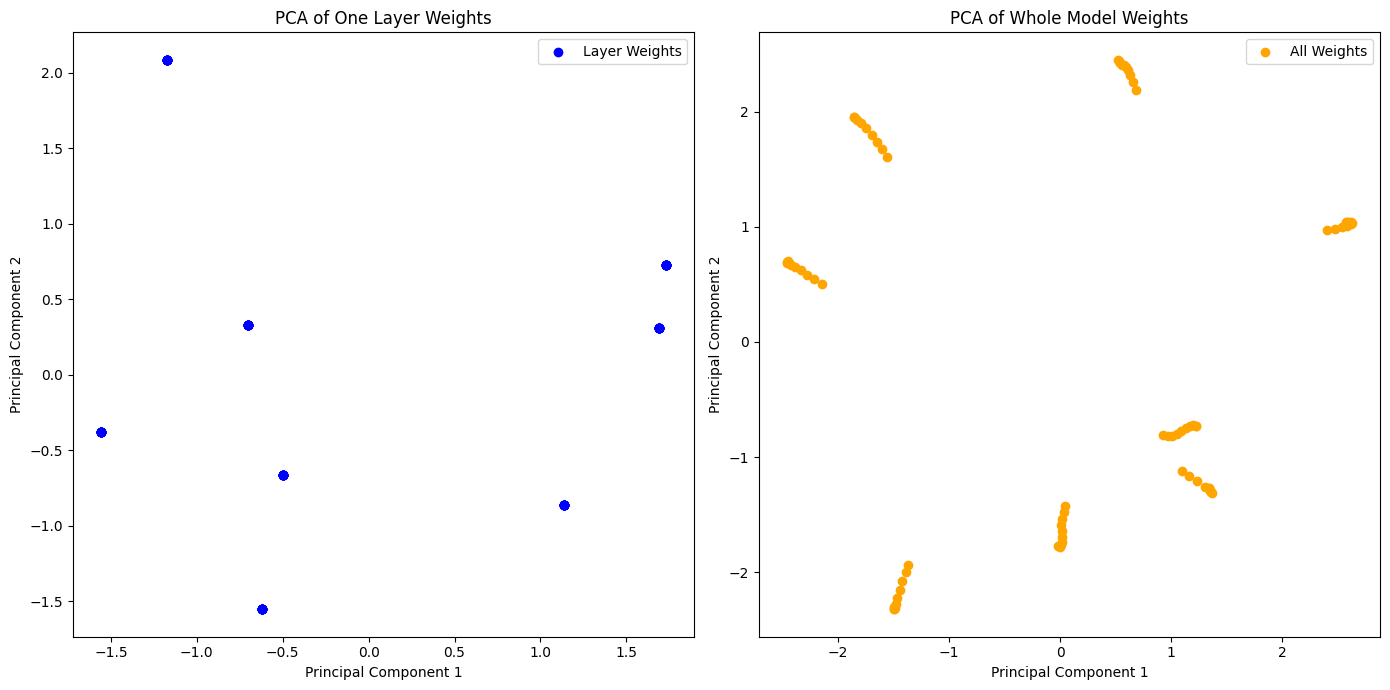

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class PyTorchModel(torch.nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def collect_weights(model):
    layer_weights = model.fc1.weight.data.view(-1).cpu().numpy()
    all_weights = torch.cat([param.data.view(-1) for param in model.parameters()], 0).cpu().numpy()
    return layer_weights, all_weights

def apply_pca(weights):
    pca = PCA(n_components=2)
    return pca.fit_transform(weights)

def train_and_collect_weights(model, x, y, epochs=100, collect_every=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.MSELoss()
    collected_layer_weights = []
    collected_all_weights = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % collect_every == 0:
            layer_weights, all_weights = collect_weights(model)
            collected_layer_weights.append(layer_weights)
            collected_all_weights.append(all_weights)

    return collected_layer_weights, collected_all_weights

x = torch.linspace(-10, 10, 200).unsqueeze(1)
y = torch.sin(x) + 0.5 * x

all_collected_layer_weights = []
all_collected_all_weights = []
for i in range(8):
    model = PyTorchModel()
    layer_weights, all_weights = train_and_collect_weights(model, x, y, epochs=30, collect_every=3)
    all_collected_layer_weights.extend(layer_weights)
    all_collected_all_weights.extend(all_weights)

pca_layer_weights = apply_pca(all_collected_layer_weights)
pca_all_weights = apply_pca(all_collected_all_weights)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].scatter(pca_layer_weights[:, 0], pca_layer_weights[:, 1], c='blue', label='Layer Weights')
axs[1].scatter(pca_all_weights[:, 0], pca_all_weights[:, 1], c='orange', label='All Weights')

axs[0].set_title('PCA of One Layer Weights')
axs[1].set_title('PCA of Whole Model Weights')
for ax in axs:
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


##**Observe Gradient Norm During Training**

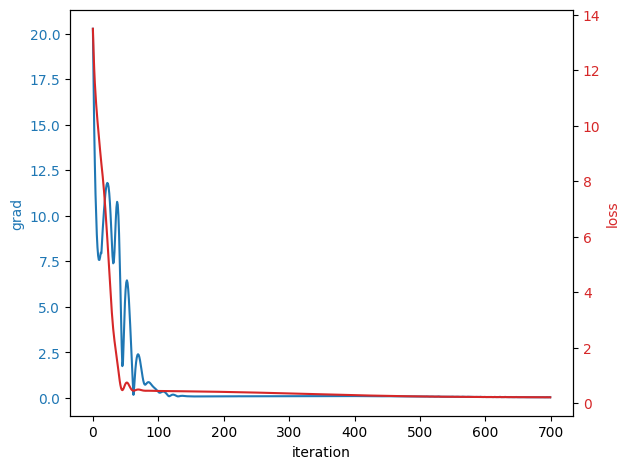

In [11]:
import torch
import matplotlib.pyplot as plt

class PyTorchModel(torch.nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def train_with_gradient_norm(model, x, y, epochs=100):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.MSELoss()
    gradient_norms = []
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        grad_all = 0.0
        for p in model.parameters():
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy() ** 2).sum()
                grad_all += grad
        grad_norm = grad_all ** 0.5

        gradient_norms.append(grad_norm)
        losses.append(loss.item())

    return gradient_norms, losses



model = PyTorchModel()
x = torch.linspace(-10, 10, 200).unsqueeze(1)
y = torch.sin(x) + 0.5 * x
gradient_norms, losses = train_with_gradient_norm(model, x.unsqueeze(1), y.unsqueeze(1), epochs=700)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('iteration')
ax1.set_ylabel('grad', color=color)
ax1.plot(gradient_norms, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('loss', color=color)
ax2.plot(losses, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


##**What Happened When Gradient is almost Zero**

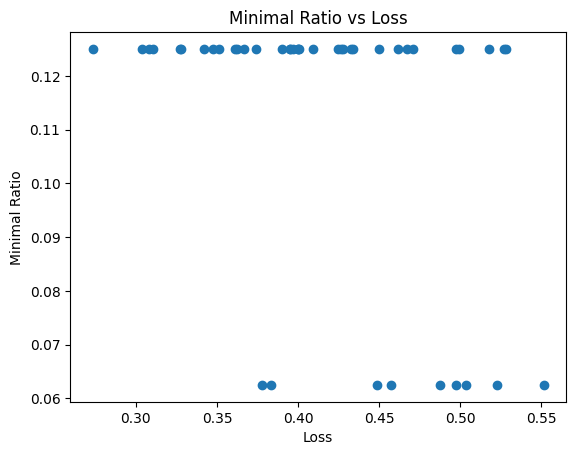

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class SinXPlusHalfXDataset(Dataset):
    def __init__(self, size=1000):
        self.x = torch.linspace(-10, 10, steps=size).unsqueeze(1)
        self.y = torch.sin(self.x) + 0.5 * self.x

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

def create_data_loader(batch_size=32):
    dataset = SinXPlusHalfXDataset()
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

data_loader = create_data_loader(batch_size=32)

class SmallNetwork(nn.Module):
    def __init__(self):
        super(SmallNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

def train_model(threshold=0.5, weight_threshold=0.1):
    model = SmallNetwork()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    minimal_ratios = []
    losses = []

    for epoch in range(100):
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            grad_norm = sum(p.grad.norm() for p in model.parameters() if p.grad is not None)
            if grad_norm < threshold:
                with torch.no_grad():
                    weights = torch.cat([p.view(-1) for p in model.parameters()])
                    min_ratio = (weights.abs() < weight_threshold).float().mean().item()
                    minimal_ratios.append(min_ratio)
                    losses.append(loss.item())

    return minimal_ratios, losses

def plot_minimal_ratio_vs_loss(minimal_ratios, losses):
    plt.plot(losses, minimal_ratios, 'o')
    plt.xlabel('Loss')
    plt.ylabel('Minimal Ratio')
    plt.title('Minimal Ratio vs Loss')
    plt.show()

minimal_ratios, losses = train_model()
plot_minimal_ratio_vs_loss(minimal_ratios, losses)


##**HW1-2 Report Questions**

**Visualize the Optimization Process**

- The model consists of three fully connected layers. ReLU activation functions are used in the hidden layers. The input is a tensor of 200 points linearly spaced between -10 and 10. Each input is transformed by a sine function with an additional 0.5 times ‘x’ noise added. The model is trained using the Adam optimizer with a learning rate of 0.01 and a loss function of mean squared error. The training ran for 100 epochs. Model parameters were recorded every 3 epochs during training. Two sets of weights were collected: the weights from the first layer and all the weights from the entire model. Principal component analysis was applied to reduce the dimensionality of the collected weights to two principal components. The training and weight collection process was repeated 8 times, which resulted in multiple sets of weights used in the PCA.

- The PCA of the first layer’s weights shows a distribution of points that seem to cluster along the diagonal axis from bottom left to top right. This suggests that there is some variance in the weights in the first layer, but the variation is predominantly along one axis in the higher dimensional space, which PCA has captured. The PCA of the entire model’s weights shows several clusters along the horizontal axis. These clusters could indicate different sets of solutions that the model’s weights have converged to during different training cycles. The multiple clusters suggest a greater diversity in how the model’s weights are distributed compared to the individual layer. Overall, the PCA visualization indicates that there’s some variance in the weights of the first layer, but the entire model’s weights exhibit a more complex structure with distinct groupings.

**Observe Gradient Norm During Training**

- It appears that the training process was effective. The model’s loss decreases over the epochs to a low value, which indicates good performance on the training data, and the gradient norm decreases and stabilizes, suggesting that the model is converging to a minimum of the loss function. The plot does not show how the model fits over the data, so further testing is necessary to determine that.

**What Happens When Gradient is Almost Zero**

- The small network I utilized for this experiment was trained to fit the function y = sin(x) + 0.5x and then analyzed the situations where the gradient norm of the model’s weight was close to zero. During the training process, after each update of the weights through backpropagation, the code calculated the gradient norm of all the model’s parameters. This was done by summing the norms of the gradients of each parameter. The gradient norm is a measure of how much the weights are changing. The code then checked whether this gradient norm was below a certain threshold, which was a small positive value which represents the almost zero condition. If the gradient norm was less than the threshold, it implied that the model’s weights are near a local minimum. The minimal ratio was used to see how many weights are close to zero. My code computed this by first creating a concatenated tensor of all the weights in the model. It then checked each weight to see if its absolute value is below a certain weight threshold. The minimal ratio was then calculated as the number of weights below this threshold divided by the total number of weights.

- Most of the data points for loss are concentrated in a narrow band of loss values, roughly between 0.3 and 0.55. This suggests that when the gradient norm is small, the loss of the model doesn’t vary wildly, which means the training process is somewhat stable. The minimal ratio values are clustered between approximately 0.06 and 0.12. There doesn’t seem to be a clear trend of minimal ratio, but the values are relatively low, which suggests that a small proportion of weights are near zero. This means that a small proportion of weights might be contributing to the model reaching a point of near zero gradients.

#HW1-3 Generalization

##**Can Network Fit Random Labels**

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3064 - accuracy: 0.1097 - val_loss: 2.3014 - val_accuracy: 0.1128
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3015 - accuracy: 0.1102 - val_loss: 2.3012 - val_accuracy: 0.1137
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3012 - accuracy: 0.1135 - val_loss: 2.3035 - val_accuracy: 0.1113
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2991 - accuracy: 0.1147 - val_loss: 2.3028 - val_accuracy: 0.1128
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2958 - accuracy: 0.1183 - val_loss: 2.3058 - val_accuracy: 0.1115
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2915 - accuracy: 0.1224 - val_loss: 2.3105 - val_accuracy: 0.1104
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2861 - accuracy: 0.1261 - val_loss: 2.3071 - val_acc

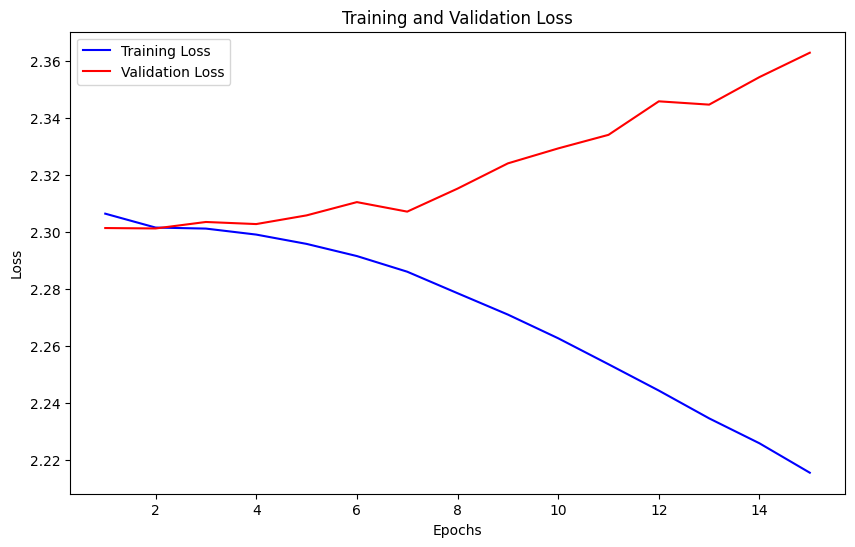

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

random_train_labels = train_labels[:]
random_test_labels = test_labels[:]

random.shuffle(random_train_labels)
random.shuffle(random_test_labels)

train_labels_one_hot = to_categorical(random_train_labels, num_classes=10)
test_labels_one_hot = to_categorical(random_test_labels, num_classes=10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_one_hot, epochs=15, validation_data=(test_images, test_labels_one_hot))

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##**Number of Parameters vs Generalization**

*This may take several minutes*

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 16)                12560     
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
1875/1875 - 4s - loss: 0.4312 - accuracy: 0.8803 - val_loss: 0.2566 - val_accuracy: 0.9276 - 4s/epoch - 2ms/step
Epoch 2/4
1875/1875 - 4s - loss: 0.2411 - accuracy: 0.9321 - val_loss: 0.2147 - val_accuracy: 0.9393 - 4s/epoch - 2ms/step
Epoch 3/4
1875/1875 - 4s - loss: 0.2

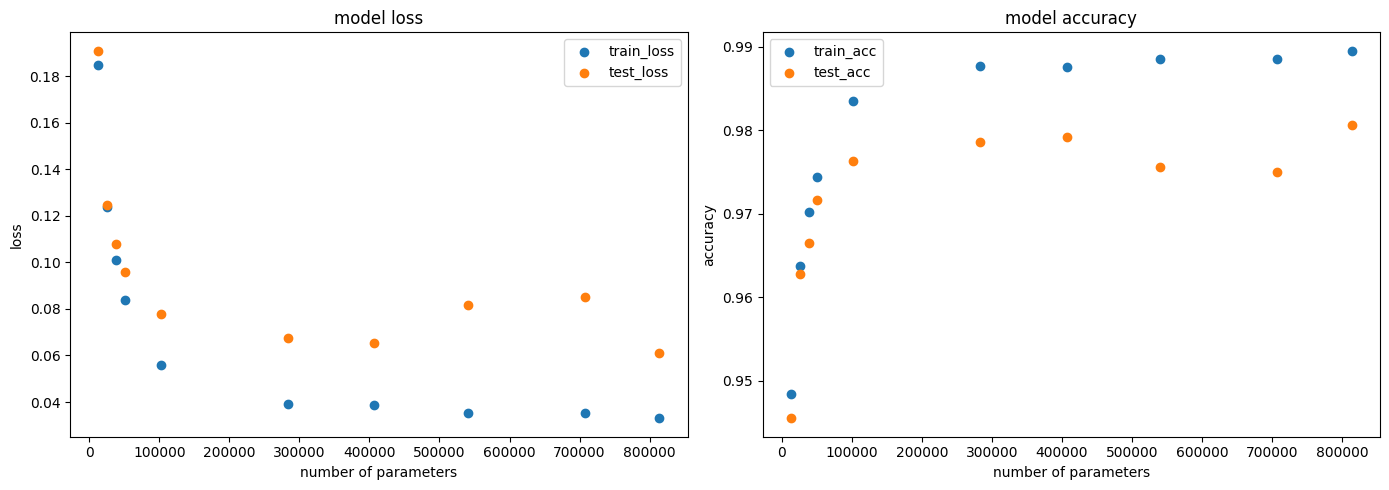

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def build_model(hidden_units):
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),
        Dense(hidden_units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

hidden_units_options = [16, 32, 48, 64, 128, 356, 512, 680, 890, 1024]

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
model_parameters = []

for units in hidden_units_options:
    model = build_model(units)
    model.summary()

    params = model.count_params()
    model_parameters.append(params)

    history = model.fit(train_images, train_labels,
                        epochs=4,
                        validation_data=(test_images, test_labels),
                        verbose=2)

    train_losses.append(history.history['loss'][-1])
    test_losses.append(history.history['val_loss'][-1])
    train_accuracies.append(history.history['accuracy'][-1])
    test_accuracies.append(history.history['val_accuracy'][-1])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(model_parameters, train_losses, label='train_loss')
plt.scatter(model_parameters, test_losses, label='test_loss')
plt.title('model loss')
plt.xlabel('number of parameters')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(model_parameters, train_accuracies, label='train_acc')
plt.scatter(model_parameters, test_accuracies, label='test_acc')
plt.title('model accuracy')
plt.xlabel('number of parameters')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##**Flatness vs Generalization**

###Part 1

*This may take several minutes*

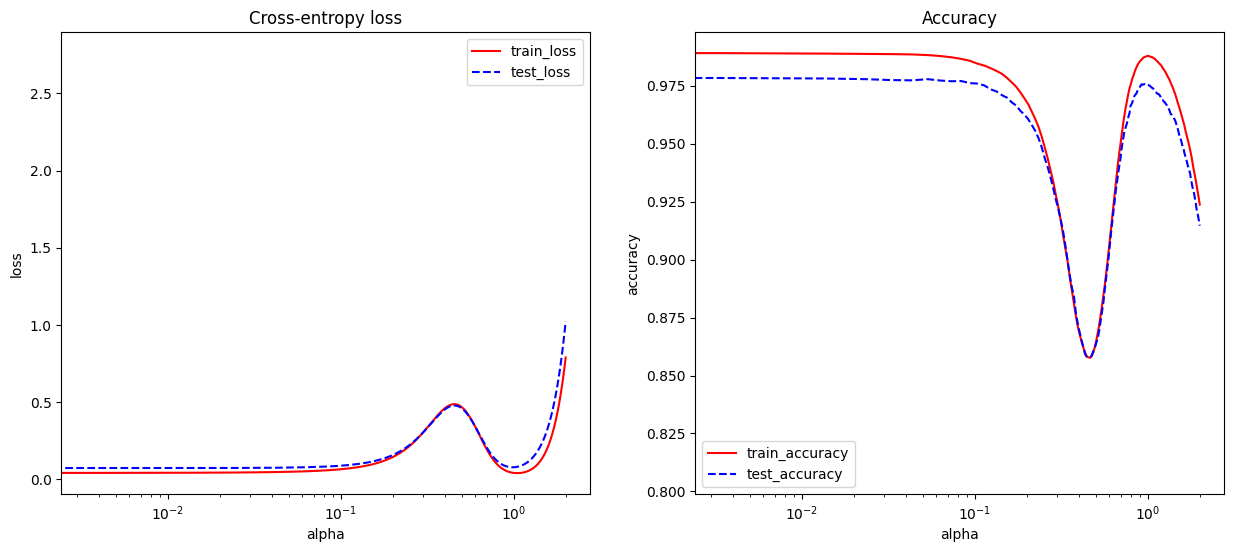

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def create_model():
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def train_model(batch_size, learning_rate):
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_images, train_labels, batch_size=batch_size, epochs=5, verbose=0)
    return model

m1 = train_model(batch_size=64, learning_rate=1e-3)
m2 = train_model(batch_size=1024, learning_rate=1e-2)

def interpolate_models(model1, model2, alpha):
    weights1 = model1.get_weights()
    weights2 = model2.get_weights()

    interpolated_weights = [w1 * (1 - alpha) + w2 * alpha for w1, w2 in zip(weights1, weights2)]
    new_model = create_model()
    new_model.set_weights(interpolated_weights)

    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return new_model

alphas = tf.linspace(-1.0, 2.0, 300)
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for alpha in alphas:
    new_model = interpolate_models(m1, m2, alpha.numpy())

    train_loss, train_accuracy = new_model.evaluate(train_images, train_labels, verbose=0)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = new_model.evaluate(test_images, test_labels, verbose=0)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, train_losses, 'r-', label='train_loss')
plt.plot(alphas, test_losses, 'b--', label='test_loss')
plt.xscale('log')
plt.title('Cross-entropy loss')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alphas, train_accuracies, 'r-', label='train_accuracy')
plt.plot(alphas, test_accuracies, 'b--', label='test_accuracy')
plt.xscale('log')
plt.title('Accuracy')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

plt.show()


###Part 2

*This may take several minutes*

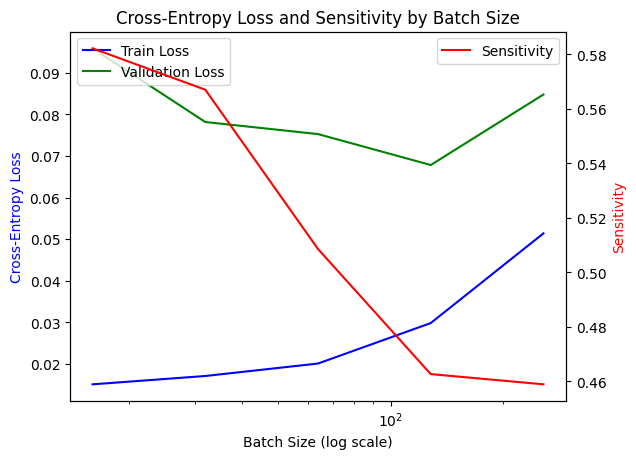

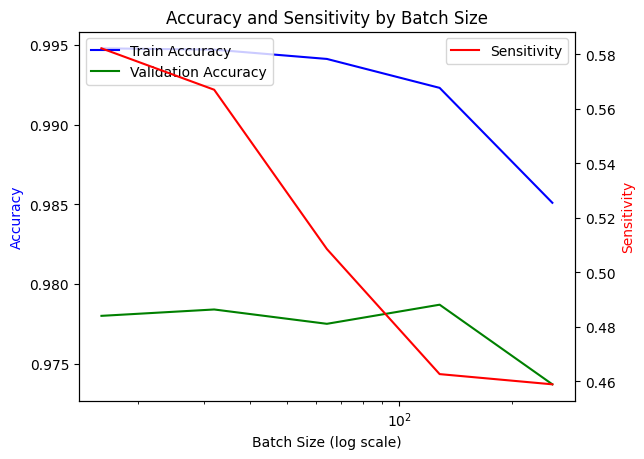

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

def compute_sensitivity(model, input_data, target_data):
    with tf.GradientTape() as tape:
        tape.watch(input_data)
        predictions = model(input_data)
        loss = tf.keras.losses.categorical_crossentropy(target_data, predictions)

    gradients = tape.gradient(loss, input_data)

    sensitivity = tf.norm(gradients, ord='fro', axis=(1, 2))
    return tf.reduce_mean(sensitivity)


def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = tf.cast(train_images, 'float32') / 255.0
test_images = tf.cast(test_images, 'float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

epochs = 10

batch_sizes = [16, 32, 64, 128, 256]
history_dict = {}

for batch_size in batch_sizes:
    model = create_model()

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(test_images, test_labels), verbose=0)

    history_dict[batch_size] = {
        'train_loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1],
        'train_accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1]
    }

sensitivity_dict = {}
for batch_size in batch_sizes:
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)

    sensitivity = compute_sensitivity(model, test_images, test_labels)
    sensitivity_dict[batch_size] = sensitivity.numpy()


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(batch_sizes, [history_dict[bs]['train_loss'] for bs in batch_sizes], 'b-', label='Train Loss')
ax1.plot(batch_sizes, [history_dict[bs]['val_loss'] for bs in batch_sizes], 'g-', label='Validation Loss')
ax2.plot(batch_sizes, [sensitivity_dict[bs] for bs in batch_sizes], 'r-', label='Sensitivity')

ax1.set_xlabel('Batch Size (log scale)')
ax1.set_ylabel('Cross-Entropy Loss', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.set_xscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Cross-Entropy Loss and Sensitivity by Batch Size')
plt.show()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(batch_sizes, [history_dict[bs]['train_accuracy'] for bs in batch_sizes], 'b-', label='Train Accuracy')
ax1.plot(batch_sizes, [history_dict[bs]['val_accuracy'] for bs in batch_sizes], 'g-', label='Validation Accuracy')
ax2.plot(batch_sizes, [sensitivity_dict[bs] for bs in batch_sizes], 'r-', label='Sensitivity')

ax1.set_xlabel('Batch Size (log scale)')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.set_xscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Accuracy and Sensitivity by Batch Size')
plt.show()


##**HW1-3 Report Questions**

**Can network fit random labels**

- The task for this experiment was to train the network model to classify images from the MNIST dataset where the labels are shuffled randomly, which means the model’s task is to actually fit to a randomly assigned label rather than learning the true digit represented in the images. This introduced noise into the training and validation process since the labels do not correspond to the actual images. The learning rate is the default learning rate for the Adam optimizer which is 0.001. The Adam optimizer is an adaptive learning rate optimization algorithm designed specifically for training deep neural networks. The model architecture is made up of a flattening layer, a dense ReLU layer, and a dense softmax activation layer.

**Number of Parameters vs Generalization**

- In this experiment, the models I used were significantly similar, with the main difference being the size of a single hidden layer. The number of neurons in this hidden layer varied across different models. The models were trained and tasked with the MNIST dataset. The performance of each model was measured in terms of loss and accuracy on both the training and validation data.

- From the graphs, it can be inferred that models with a high number of parameters tend to have better training performance but do not necessarily lead to better generalization. This could be because larger models are more prone to overfitting, which leads to decreased performance on new data.

**Flatness vs Generalization**

*Part 1*

- This experiment was based on two models trained on the MNIST dataset. The models were similar but had different training approaches. The first model was trained with a batch size of 64 and a learning rate of 1e-3. The second model was trained with a batch size of 1024 and a learning rate of 1e-2. Each model was trained for 5 epochs. The Adam optimizer was used for training efficiency.

- The loss graph shows that both models have a U-shaped curve with a minimum loss at ~alpha 0.1. The training and test losses diverge for alpha values less than 0.01 and greater than 1, which suggests overfitting when moving away from the optimal interpolation between the models. Similarly, the is an inverted U-shape for accuracy, with a peak around the same alpha value where the loss is minimized. The accuracy drops significantly for alpha values less than 0.001 and greater than 1, which coincides with the increase in loss. Both graphs indicate that a blend of both models would result in optimal performance.

*Part 2*

- This experiment was based on the task of utilizing the MNIST dataset and five similar models that use different batch sizes during training.

- The results indicate that while larger batch sizes can lead to lower training loss and high training accuracy, they may also cause the model to be more sensitive to input changes and could potentially harm validation performance due to overfitting. The results are also consistent with current understanding in the field: smaller batch sizes tend to provide more noise during training, which can help with generalization, while larger batch sizes provide more accurate estimates of the gradient but can lead to convergence to suboptimal points in the loss landscape. Sensitivity seems to decrease in value as batch size increases. The cross entropy loss increases as the batch size increases suggesting batch size affects the generalization and loss of the model.